<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/nn_14_mult_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --q ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.9 MB/s eta 0:00:00
time: 415 µs (started: 2024-07-07 13:27:25 +00:00)


## NN muti
-iris 데이터를 이용
- 3개의 클래스를 예측하는 것이 목표 !

## 데이터 준비

In [2]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv

--2024-07-07 13:28:52--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3858 (3.8K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.77K  --.-KB/s    in 0s      

2024-07-07 13:28:52 (51.3 MB/s) - ‘iris.csv’ saved [3858/3858]

time: 228 ms (started: 2024-07-07 13:28:52 +00:00)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

SEED=42

time: 7.02 s (started: 2024-07-07 13:28:56 +00:00)


In [4]:
df = pd.read_csv('iris.csv')
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


time: 69.8 ms (started: 2024-07-07 13:29:06 +00:00)


In [5]:
df.shape

(150, 5)

time: 3.25 ms (started: 2024-07-07 13:29:09 +00:00)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
time: 22.8 ms (started: 2024-07-07 13:29:09 +00:00)


In [7]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


time: 32.9 ms (started: 2024-07-07 13:29:11 +00:00)


In [8]:
df.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Species         0
dtype: int64

time: 6.17 ms (started: 2024-07-07 13:29:14 +00:00)


In [9]:
df.Species.value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

time: 4.9 ms (started: 2024-07-07 13:29:15 +00:00)


## 범주형 변수

In [10]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

time: 3.5 ms (started: 2024-07-07 13:29:18 +00:00)


<Axes: xlabel='Species'>

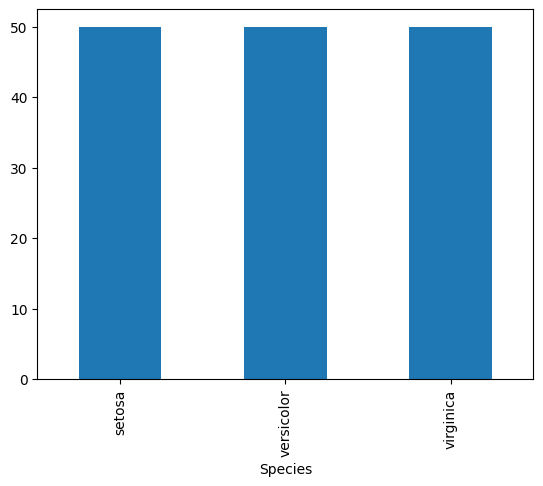

time: 235 ms (started: 2024-07-07 13:29:19 +00:00)


In [11]:
df['Species'].value_counts().plot(kind='bar')

## 수치형(연속형)변수

(array([ 4.,  1.,  6., 10.,  5.,  8.,  5.,  3.,  5.,  3.]),
 array([4.9 , 5.11, 5.32, 5.53, 5.74, 5.95, 6.16, 6.37, 6.58, 6.79, 7.  ]),
 <BarContainer object of 10 artists>)

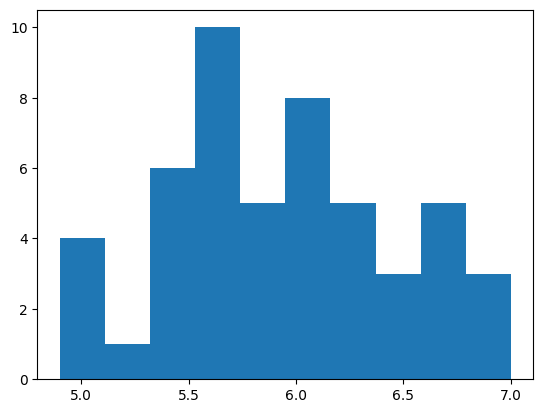

time: 232 ms (started: 2024-07-07 13:29:24 +00:00)


In [12]:
df_versicolor = df[df['Species']=='versicolor']
plt.hist(df_versicolor['Sepal Length'])

## 데이터 섞기
  - sklearn 의 train_test_split 내부적으로 데이터를 섞어서 스플릿 하지만 혹시 모르니 미리 섞자.

In [14]:
df= df.sample(frac=1,random_state=SEED)
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
101,5.8,2.7,5.1,1.9,virginica
55,5.7,2.8,4.5,1.3,versicolor
79,5.7,2.6,3.5,1.0,versicolor
5,5.4,3.9,1.7,0.4,setosa
148,6.2,3.4,5.4,2.3,virginica
...,...,...,...,...,...
33,5.5,4.2,1.4,0.2,setosa
112,6.8,3.0,5.5,2.1,virginica
19,5.1,3.8,1.5,0.3,setosa
83,6.0,2.7,5.1,1.6,versicolor


time: 23.4 ms (started: 2024-07-07 13:29:48 +00:00)


## 데이터 셋 분리

In [15]:
from sklearn.model_selection import train_test_split
train,test =train_test_split(df,test_size=0.2,shuffle=True,random_state=SEED)
train.shape, test.shape

((120, 5), (30, 5))

time: 446 ms (started: 2024-07-07 13:30:04 +00:00)


## X,y 분리

In [16]:
X_train = train.drop('Species',axis=1)
y_train= train['Species']
X_train.shape , y_train.shape

((120, 4), (120,))

time: 5.48 ms (started: 2024-07-07 13:30:10 +00:00)


## 스케일링 & 인코딩

In [17]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_train_s
y_train_e=y_train.to_numpy() # 넘파이 배열로 변환

time: 12.2 ms (started: 2024-07-07 13:30:23 +00:00)


In [18]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_train_e =le.fit_transform(y_train)
y_train_e , y_train_e.shape

(array([2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1,
        1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1,
        2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2,
        0, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 2, 0,
        2, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0,
        2, 0, 1, 0, 0, 0, 1, 2, 1, 0]),
 (120,))

time: 5.65 ms (started: 2024-07-07 13:30:28 +00:00)


  - 다중 분류이기 때문에 원 핫 인코딩

In [19]:
from keras import utils

y_train_o=utils.to_categorical(y_train_e)
y_train_o[:10], y_train_o.shape

(array([[0., 0., 1.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [0., 0., 1.],
        [1., 0., 0.]], dtype=float32),
 (120, 3))

time: 6.37 ms (started: 2024-07-07 13:30:55 +00:00)


# 모델 적합

In [20]:
print(X_train_s.shape, y_train_o.shape)
print(type(X_train_s),type(y_train_o))

(120, 4) (120, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 2.6 ms (started: 2024-07-07 13:31:02 +00:00)


In [21]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16,activation='relu',input_shape=(4,)),
    layers.Dense(units=8,activation='relu'),
    layers.Dense(units=3,activation='softmax'),


])

time: 112 ms (started: 2024-07-07 13:31:39 +00:00)


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 243 (972.00 Byte)
Trainable params: 243 (972.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 22.6 ms (started: 2024-07-07 13:31:41 +00:00)


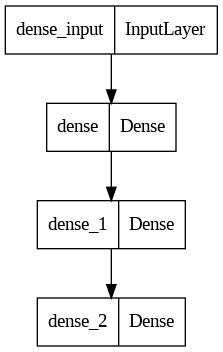

time: 283 ms (started: 2024-07-07 13:32:02 +00:00)


In [23]:
from keras import utils

utils.plot_model(model)

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

time: 29.4 ms (started: 2024-07-07 13:32:20 +00:00)


In [25]:
EPOCHS=50
BATCH_SIZE=16
history= model.fit(X_train_s,y_train_o,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2
          )

Epoch 1/50
6/6 [==============================] - 2s 85ms/step - loss: 1.1390 - accuracy: 0.4062 - val_loss: 1.1123 - val_accuracy: 0.4167
Epoch 2/50
6/6 [==============================] - 0s 17ms/step - loss: 1.0983 - accuracy: 0.4271 - val_loss: 1.0588 - val_accuracy: 0.4167
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 1.0580 - accuracy: 0.4688 - val_loss: 1.0120 - val_accuracy: 0.4167
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 1.0215 - accuracy: 0.5208 - val_loss: 0.9715 - val_accuracy: 0.5417
Epoch 5/50
6/6 [==============================] - 0s 18ms/step - loss: 0.9895 - accuracy: 0.5938 - val_loss: 0.9335 - val_accuracy: 0.7500
Epoch 6/50
6/6 [==============================] - 0s 15ms/step - loss: 0.9548 - accuracy: 0.6458 - val_loss: 0.9013 - val_accuracy: 0.7917
Epoch 7/50
6/6 [==============================] - 0s 17ms/step - loss: 0.9236 - accuracy: 0.7604 - val_loss: 0.8742 - val_accuracy: 0.8333
Epoch 8/50
6/6 [===========

## 학습 과정 시각화

In [26]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()


time: 5.6 ms (started: 2024-07-07 13:32:49 +00:00)


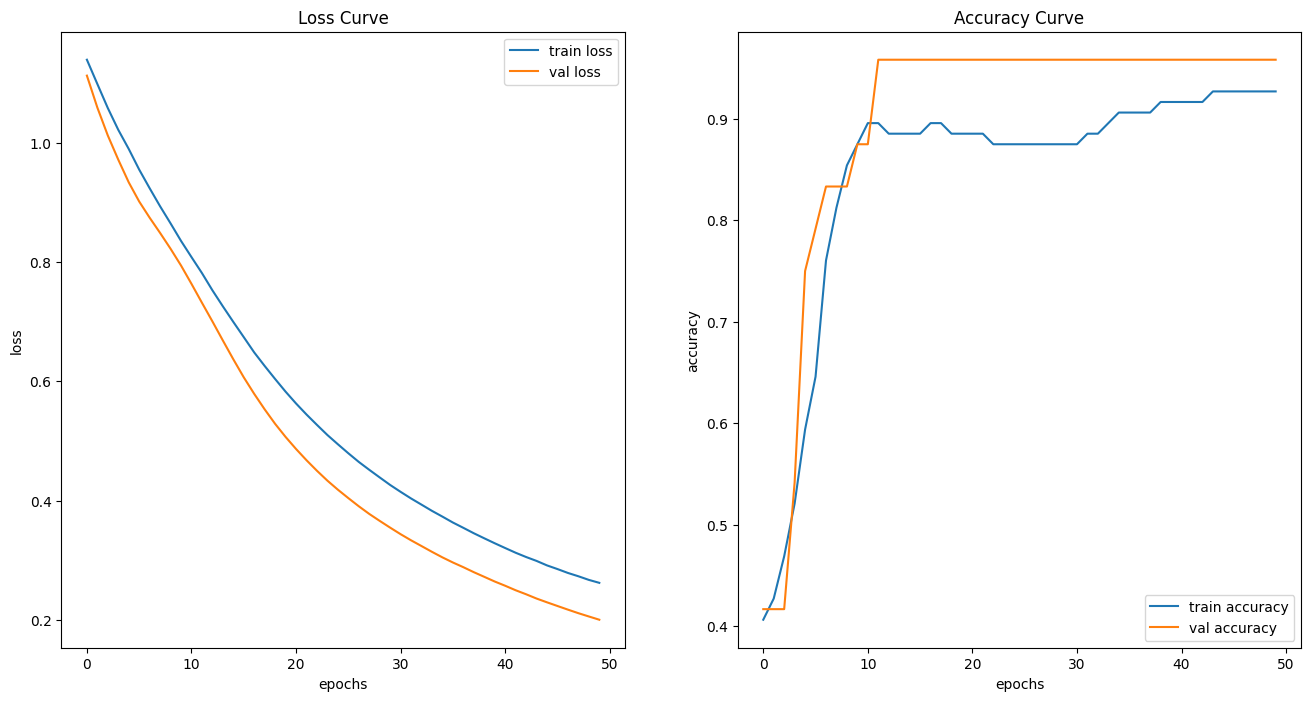

time: 497 ms (started: 2024-07-07 13:32:52 +00:00)


In [27]:
plot_history(history)

## 테스트

In [28]:
X_test = test.drop('Species',axis=1)
y_test = test['Species']

time: 3.13 ms (started: 2024-07-07 13:33:00 +00:00)


## 스케일링 & 인코딩

In [29]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_test_s = ss.fit_transform(X_test)
# X_test_s
y_test_e=y_test.to_numpy()

time: 6.67 ms (started: 2024-07-07 13:33:05 +00:00)


In [30]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y_test_e =le.fit_transform(y_test)
y_test_e , y_train_e.shape

(array([0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0,
        0, 2, 1, 0, 2, 2, 0, 0]),
 (120,))

time: 4.74 ms (started: 2024-07-07 13:33:06 +00:00)


In [32]:
from keras import utils

y_test_o=utils.to_categorical(y_test_e)
y_test_o[:10], y_test_o.shape

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 1.]], dtype=float32),
 (30, 3))

time: 15.3 ms (started: 2024-07-07 13:33:15 +00:00)


In [33]:
y_pred = model.predict(X_test_s)
y_pred[:10]

1/1 [==============================] - 0s 294ms/step


array([[9.4346189e-01, 4.2479903e-02, 1.4058150e-02],
       [5.0413176e-02, 7.8603792e-01, 1.6354893e-01],
       [3.2694519e-02, 8.7778568e-01, 8.9519829e-02],
       [8.9974713e-01, 8.3623379e-02, 1.6629558e-02],
       [2.8091414e-02, 7.8895563e-01, 1.8295293e-01],
       [2.9534221e-02, 3.0745155e-01, 6.6301417e-01],
       [3.7860818e-04, 6.1900411e-02, 9.3772095e-01],
       [1.0060301e-02, 9.1199690e-01, 7.7942923e-02],
       [8.1796544e-03, 1.6541459e-01, 8.2640582e-01],
       [2.4515186e-03, 3.0991456e-01, 6.8763393e-01]], dtype=float32)

time: 614 ms (started: 2024-07-07 13:33:22 +00:00)


In [34]:
y_pred = np.argmax(y_pred, axis=1) # 1차원 벡터로 변환
y_pred[:10]


array([0, 1, 1, 0, 1, 2, 2, 1, 2, 2])

time: 9.58 ms (started: 2024-07-07 13:33:35 +00:00)


In [35]:
y_test_o = np.argmax(y_test_o, axis=1) # 1차원 벡터로 변환
y_test_o[:10]

array([0, 1, 1, 0, 1, 1, 2, 1, 2, 2])

time: 12 ms (started: 2024-07-07 13:34:11 +00:00)


In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true,y_pred,aver='macro'):
  print('accuracy',accuracy_score(y_true,y_pred))
  print('recall',recall_score(y_true,y_pred,average=aver))
  print('precision',precision_score(y_true,y_pred,average=aver))
  print('f1_score',f1_score(y_true,y_pred, average=aver))

  cfm = confusion_matrix(y_true,y_pred)
  s = sns.heatmap(cfm,annot=True,cmap='Blues',fmt='d',cbar=False)
  s.set(xlabel='Prediction',ylabel='Actual')
  plt.show()

time: 1.18 ms (started: 2024-07-07 13:34:16 +00:00)


accuracy 0.9333333333333333
recall 0.9047619047619048
precision 0.9444444444444445
f1_score 0.914141414141414


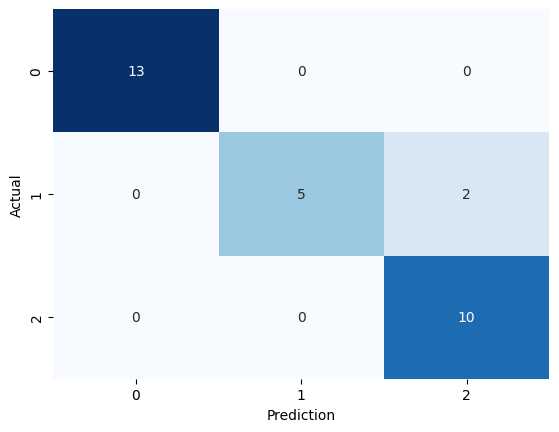

time: 262 ms (started: 2024-07-07 13:34:19 +00:00)


In [37]:
print_metrics(y_test_o,y_pred)

## 결론
  - 참고로  test데이터에서 y_test를 원 핫 인코딩 할 필요는 없다. 이유는 평가를 위해 어짜피 1차원 벡터로 변환 했기 때문이다.
  - 즉 y_test_e = np.argmax(y_test_o, axis=1) 이다.